# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Steven Hesang
- **Email:** m001d4ky1679@bangkit.academy
- **ID Dicoding:** steven_bangkit

## Menentukan Pertanyaan Bisnis

- Bagaimana peforma penjualan beberapa bulan terakhir?
- Produk pada kategori apa yang paling banyak dan sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi? 
- Seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat tabel customers

In [2]:
customers_df = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membuat tabel products

In [3]:
products_df = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membuat tabel product_category_name_translation yang digunakan untuk mengubah bahasa kolom product_category_name dari tabel products ke bahasa inggris

In [4]:
product_category_name_translation_df = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Membuat table orders

In [5]:
orders_df = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membuat table order_items

In [6]:
order_items_df = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

#### Menilai data customers_df

In [7]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak terdapat masalah pada data type, semua data type telah benar adanya

In [8]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak terdapat missing value pada data ini

In [9]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi pada data ini

#### Menilai data products_df

In [10]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dapat dilihat bahwa terdapat beberapa kolom yang nilainya berbeda. Jika semuanya terisi tanpa missing value seharusnya menunjukan angka 32951

In [11]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght dan product_photos_qty <br>
Kemudian terdapat 2 missing value pada product_weight_g, product_length_cm, product_height_cm, dan product_width_cm <br>
Pada tahap selanjutnya akan dilakukan cleaning data untuk tabel products_df

In [12]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada data ini

In [13]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Masih masuk akal untuk suatu produk untuk memiliki berat 40425 gram. Perhatikan bahwa terdapat produk yang memiliki berat 0 gram. Hal ini merusakan salah satu inaccurate value

#### Menilai data product_category_name_translation_df

In [14]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [15]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat masalah data type, missing value, dan duplikasi untuk data product_category_name_translation_df


#### Menilai data orders_df

In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat permasalahan tipe data, seharusnya order_purchase_timestamp hingga order_estimated_delivery_date memiliki tipe data **datetime** bukan **object**

In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Missing value mungkin terjadi karena terdapat perbedaan **order_status**. Misalnya barang yang processing bisa saja masih belum dikirim oleh kurir, sehingga **order_delivered_carrier_date** dan **order_delivered_customer_date** kosong

untuk inaccurate value akan di cek ketika tipe data pada tabel orders_df telah dibenarkan

#### Menilai data order_items_df

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat permasalahan tipe data, shipping_limit_date seharusnya  memiliki tipe data **datetime** bukan **object**

In [21]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak terdapat missing value untuk order_item_df

In [22]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi pada order_items

In [23]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Terlihat bahwa ada barang yang memiliki harga yang berbeda jauh dengan yang lain, yaitu $6735. Tergantung dari jenis barangnya, tapi karena memungkinkan suatu barang memiliki harga tersebut sehingga tidak termasuk dalam inaccurate value. 

|  | Tipe Data | Missing value | Duplicate data | Inaccurate value |
| -------------------- | -------------------- | -------------------- | -------------------- | -------------------- |
| costumers_df | - | - | - | - |
| products_df | - | 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght dan product_photos_qty dan 2 missing value pada kolom  product_weight_g, product_length_cm, product_height_cm, dan product_width_cm | - | terdapat inaccurate value pada kolom product_weight_g | 
| product_category_name_translation_df | - | - | - | - |
| orders_df | terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date | terdapat 160 missing value pada kolom order_approved_at, 1783 missing value pada kolom order_delivered_carrier_date, dan 2965 missing value pada kolom order_delivered_customer_date yang seharusnya datetime bukan object | - | - |
| order_items_df | terdapat kesalahan tipe data pada kolom shipping_limit_date yang seharusnya datetime bukan object | - | - | - |



### Cleaning Data

#### Membersihkan data products_df

- 610 missing value pada kolom **product_category_name**, **product_name_lenght**, **product_description_lenght** dan **product_photos_qty** dan 2 missing value pada kolom **product_weight_g**, **product_length_cm**, **product_height_cm**, dan **product_width_cm** <br>
- terdapat inaccurate value pada kolom **product_weight_g**

Perlu untuk menangani missing value pada data products_df

In [24]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [26]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

untuk missing value pada **product_category_name** akan diisi dengan kategori yang paling banyak muncul, yaitu **cama_mesa_banho**

In [27]:
products_df.product_category_name.fillna(value = 'cama_mesa_banho', inplace = True)

Missing value pada **product_name_lenght**, **product_description_lenght**, dst akan diisi dengan nilai mediannya agar tidak rusak karena outlier

In [28]:
products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(), inplace = True)
products_df.product_description_lenght.fillna(products_df.product_description_lenght.median(), inplace = True)
products_df.product_photos_qty.fillna(products_df.product_photos_qty.median(), inplace = True)
products_df.product_weight_g.fillna(products_df.product_weight_g.median(), inplace = True)
products_df.product_length_cm.fillna(products_df.product_length_cm.median(), inplace = True)
products_df.product_height_cm.fillna(products_df.product_height_cm.median(), inplace = True)
products_df.product_width_cm.fillna(products_df.product_width_cm.median(), inplace = True)

In [29]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Setelah itu perlu menangani inaccurate value pada kolom **product_weight_g**, di ganti dengan mediannya

In [31]:
products_df.product_weight_g.replace(products_df.product_weight_g.min(), products_df.product_weight_g.median(),inplace = True)

In [32]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2276.461777,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4281.888156,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Membersihkan data orders_df

- terdapat kesalahan tipe data pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date**
- terdapat 160 missing value pada kolom **order_approved_at**, 1783 missing value pada kolom **order_delivered_carrier_date**, dan 2965 missing value pada kolom **order_delivered_customer_date** yang seharusnya **datetime** bukan **object**

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pertama, mari ubah tipe data pada kolom yang seharusnya datetime menjadi datetime

In [34]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [35]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Sekarang mari menangani missing value

In [36]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [37]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Kita perlu memastikan apakah ada yang **order_status** bukan **canceled** tapi tetap kosong 

In [38]:
orders_df[orders_df.order_approved_at.isna()].loc[orders_df.order_status != 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27


<!-- Untuk data yang **order_status** nya kosong, kita bisa biarkan saja karena pada dasarnya ordernya bisa saja belum di konfimasi. Sekarang kita perlu mengisi nilai kosong pada **order_approved_at** -->

Ternyata tetap masih ada **order_approved_at** yang kosong. Oleh karena itu kita tetap perlu melakukan imputasi. Teknik imputasi yang dilakukan adalah teknik rata-rata. Jadi akan dihitung rata-rata selisih dari **order_approved_at** dengan **order_purchase_timestamp** yang tidak NaT. Setelah nilai rata-rata didapatkan, nilai dari **order_approved_at** yang NaT akan diisi dengan nilai **order_purchase_timestamp** ditambahkan dengna rata-rata selisih tadi

In [39]:
temp = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
avg_time = temp.mean()
avg_time

Timedelta('0 days 10:25:08.739486910')

In [40]:
orders_df.order_approved_at.fillna(orders_df.order_purchase_timestamp + avg_time, inplace = True)

Setelah itu untuk missing value pada **order_delivered_carrier_date** dan **order_delivered_customer_date** akan diisi dengan **order_estimated_delivery_date**

In [41]:
orders_df.order_delivered_carrier_date.fillna(orders_df.order_estimated_delivery_date, inplace = True)
orders_df.order_delivered_customer_date.fillna(orders_df.order_estimated_delivery_date, inplace = True)

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Membersihkan data order_items_df

- terdapat kesalahan tipe data pada kolom **shipping_limit_date** yang seharusnya **datetime** bukan **object**

In [43]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Sekarang langsung saja ubah tipe datanya

In [44]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [45]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore data customers_df

In [46]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Mari lihat persebaran pelanggan berdasarkan kotanya

In [47]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Berdasarkan hasil diatas, banyak pelanggan yang berasal dari kota **sao paulo**, **rio de janeiro**, **belo horizonte**, **brasilia**, dan **curitiba**. Pelanggan kebanyakan berasal dari kota **sao paulo** yang berjumlah sampai 15540 orang.

In [48]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan hasil diatas, banyak pelanggan yang berasal dari negara berkode **SP**, **RJ**, dan **MG**. Sementara itu hanya sedikit pelanggan yang berasal dari negara berkode **RR**, **AP**, dan **AC**

### Explore data products_df

In [49]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [50]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.461777,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.888156,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Pada tabel **products_df** terdapat banyak informasi yang bisa didapatkan. Pertama, banyak produk yang memiliki kategori **cama_mesa_banho**. Kategori ini masih berbahasa asing. Nanti akan diperlukan penggabungan antara tabel **products_df** dengan **product_category_name_translation_df**. Kemudian untuk berat produk memiliki rata-rata berat sebesar 2276.46 gram dengan berat produk berkisar antara 2 gram hingga 40425 gram. Untuk panjang produk memiliki rata-rata panjang sebesar 30.8 cm dengan panjang produk berkisar antara 7 cm sampai 105 cm. Untuk tinggi produk memiliki rata-rata tinggi sebesar 16.9 cm dengan tinggi berkisar antara 2 cm sampai 105 cm. Terakhir untuk lebar produk memiliki rata-rata lebar sebesar 23.19 cm dengan lebar produk berkisar antara 6 cm sampai 118 cm. 

### Explore data orders_df

In [51]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [52]:
orders_df['delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']

In [53]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:08:21.516067840,2018-01-03 23:29:23.449764096,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,12 days 11:42:19.466152614
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-09-30 00:00:00,2016-09-30 00:00:00,2016-09-30 00:00:00,-146 days +08:42:22
25%,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 23:13:41,2017-09-22 21:28:06,2017-10-03 00:00:00,6 days 09:54:33
50%,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 20:32:30,2018-02-01 19:34:49,2018-02-15 00:00:00,10 days 01:22:57
75%,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 11:19:00,2018-05-15 17:51:03,2018-05-25 00:00:00,15 days 18:08:55
max,2018-10-17 17:30:18,2018-10-18 03:55:26.739486910,2018-11-12 00:00:00,2018-11-12 00:00:00,2018-11-12 00:00:00,208 days 12:01:24
std,NaN,NaN,NaN,NaN,NaN,9 days 18:53:51.360130444


In [54]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99441 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns] 
 6   order_delivered_customer_date  99441 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_time                  99441 non-null  timedelta64[ns]
dtypes: datetime64[ns](5), object(3), timedelta64[ns](1)
memory usage: 6.8+ MB


In [55]:
orders_df[orders_df.delivery_time <= pd.to_timedelta(0)].count()

order_id                         67
customer_id                      67
order_status                     67
order_purchase_timestamp         67
order_approved_at                67
order_delivered_carrier_date     67
order_delivered_customer_date    67
order_estimated_delivery_date    67
delivery_time                    67
dtype: int64

Ternyata masih terdapat data yang aneh. Karena data cenderung kecil, kita bisa melakukan drop baris tersebut

In [56]:
orders_df = orders_df.drop(orders_df[orders_df['delivery_time'] <= pd.Timedelta(0)].index)

In [57]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99374,99374,99374,99374,99374,99374
mean,2017-12-31 07:13:28.153953536,2017-12-31 17:29:19.618223360,2018-01-03 21:59:00.118954752,2018-01-13 05:27:39.863364864,2018-01-24 01:47:13.876064,12 days 11:58:20.245141406
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0 days 00:11:02
25%,2017-09-12 14:27:36.249999872,2017-09-12 20:46:27.249999872,2017-09-14 22:47:26.500000,2017-09-22 21:22:56,2017-10-03 00:00:00,6 days 10:04:26.250000
50%,2018-01-18 21:09:34,2018-01-19 09:46:20.500000,2018-01-23 19:45:00.500000,2018-02-01 18:31:59.500000,2018-02-15 00:00:00,10 days 01:29:40
75%,2018-05-04 15:02:02,2018-05-04 21:50:17.500000,2018-05-08 10:16:30,2018-05-15 17:24:49.500000,2018-05-25 00:00:00,15 days 18:18:46.500000
max,2018-10-17 17:30:18,2018-10-18 03:55:26.739486910,2018-11-12 00:00:00,2018-11-12 00:00:00,2018-11-12 00:00:00,208 days 12:01:24
std,NaN,NaN,NaN,NaN,NaN,9 days 18:29:49.191813570


Dari tabel diatas, kita dapat memperoleh informasi bahwa **delivery_time** memiliki waktu pengiriman dengan median 10 hari 1 jam 29 menit dengan pengiriman tercepatan dalam waktu 11 menit dan pengiriman terlama dalam waktu 208 hari.

### Explore data order_items_df

In [58]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [59]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [60]:
order_items_df.price.sum()

13591643.700000003

### Explore order_items_df dan products_df

In [61]:
order_items_df.info()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   pro

Lakukan operasi merge pada order_items_df dengan products_df berdasarkan product_id

In [62]:
order_items_products_df = pd.merge(
    left = order_items_df,
    right = products_df,
    how = 'left',
    left_on = "product_id",
    right_on = "product_id"
)

In [63]:
order_items_products_df.groupby(by='product_category_name').agg({
    "product_id" : "nunique",
    "price" : ["min", "max", "mean", "std"]

})

product_id  price                                 
                             nunique    min      max        mean         std
product_category_name                                                       
agro_industria_e_comercio         74  12.99  2990.00  342.124858  419.429802
alimentos                         82   9.99   274.99   57.634137   41.337421
alimentos_bebidas                104   6.50   699.90   54.602446   68.717537
artes                             55   3.50  6499.00  115.802105  445.661765
artes_e_artesanato                19   9.80   289.49   75.583750   73.997815
...                              ...    ...      ...         ...         ...
sinalizacao_e_seguranca           93   4.50   740.00  108.086583  124.609743
tablets_impressao_imagem           9  14.90   889.99   90.703735   93.096747
telefonia                       1134   5.00  2428.00   71.213978  135.765167
telefonia_fixa                   116   6.00  1790.00  225.693182  420.831784
utilidades_domesticas           2335   3.06  6735.00   90.788148  141.533996

[73 rows x 5 columns]

Dibuatlah pivot tabel berdasarkan kategori produk. Pivot tabel tersebut menunjukan total penjualan untuk masing-masing kategori, berupa banyaknya produk yang terjual, harga minimum, maksimum, rata-rata, dan simpangan baku produk per kategori

karena product_category_name masih dalam bahasa asing, kita perlu menggabungkannya dengan data product_category_name_translation_df

In [64]:
order_items_products_translated_df = pd.merge(
    left = order_items_products_df,
    right = product_category_name_translation_df,
    how = 'left',
    left_on = "product_category_name",
    right_on = "product_category_name"
)

In [65]:
order_items_products_translated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [66]:
order_items_products_translated_df.product_category_name_english.fillna(order_items_products_translated_df.product_category_name, inplace=True)

In [67]:
order_items_products_translated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          112650 non-null  object        
 8   product_name_lenght            112650 non-null  float64       
 9   product_description_lenght     112650 non-null  float64       
 10  product_photos_qty             112650 non-null  float64       
 11  

In [68]:
order_items_products_translated_df.groupby(by='product_category_name_english').agg({
    "product_id" : "nunique",
    "price" : ["min", "max", "mean", "std"]

})

product_id  price                       \
                                 nunique    min      max        mean   
product_category_name_english                                          
agro_industry_and_commerce            74  12.99  2990.00  342.124858   
air_conditioning                     124  10.90  1599.00  185.269226   
art                                   55   3.50  6499.00  115.802105   
arts_and_craftmanship                 19   9.80   289.49   75.583750   
audio                                 58  14.90   598.99  139.254121   
...                                  ...    ...      ...         ...   
stationery                           849   2.29  1693.00   91.753369   
tablets_printing_image                 9  14.90   889.99   90.703735   
telephony                           1134   5.00  2428.00   71.213978   
toys                                1411   4.90  1699.99  117.548360   
watches_gifts                       1329   8.99  3999.90  201.135984   

                                           
                                      std  
product_category_name_english              
agro_industry_and_commerce     419.429802  
air_conditioning               189.715803  
art                            445.661765  
arts_and_craftmanship           73.997815  
audio                          159.685656  
...                                   ...  
stationery                      84.335504  
tablets_printing_image          93.096747  
telephony                      135.765167  
toys                           131.421844  
watches_gifts                  256.742470  

[73 rows x 5 columns]

Dibuatlah pivot tabel berdasarkan kategori produk. Pivot tabel tersebut menunjukan total penjualan untuk masing-masing kategori, berupa banyaknya produk yang terjual, harga minimum, maksimum, rata-rata, dan simpangan baku produk per kategori

In [69]:
order_items_products_translated_df.groupby(by='product_id').agg({
    "product_id" : "nunique",
    "price" : ["min", "max", "mean", "std"]

})

product_id   price                          
                                    nunique     min     max    mean       std
product_id                                                                   
00066f42aeeb9f3007548bb9d3f33c38          1  101.65  101.65  101.65       NaN
00088930e925c41fd95ebfe695fd2655          1  129.90  129.90  129.90       NaN
0009406fd7479715e4bef61dd91f2462          1  229.00  229.00  229.00       NaN
000b8f95fcb9e0096488278317764d19          1   58.90   58.90   58.90  0.000000
000d9be29b5207b54e86aa1b1ac54872          1  199.00  199.00  199.00       NaN
...                                     ...     ...     ...     ...       ...
fff6177642830a9a94a0f2cba5e476d1          1  109.99  119.99  114.99  7.071068
fff81cc3158d2725c0655ab9ba0f712c          1   90.00   90.00   90.00       NaN
fff9553ac224cec9d15d49f5a263411f          1   32.00   32.00   32.00       NaN
fffdb2d0ec8d6a61f0a0a0db3f25b441          1   29.99   34.99   33.99  2.236068
fffe9eeff12fcbd74a2f2b007dde0c58          1  249.99  249.99  249.99       NaN

[32951 rows x 5 columns]

Pivot tabel diatas dikelompokan berdasarkan **product_id** karena tidak adanya nama produk yang bersangkutan

### Explore customers_df dan orders_df

In [70]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [71]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99374 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99374 non-null  object         
 1   customer_id                    99374 non-null  object         
 2   order_status                   99374 non-null  object         
 3   order_purchase_timestamp       99374 non-null  datetime64[ns] 
 4   order_approved_at              99374 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   99374 non-null  datetime64[ns] 
 6   order_delivered_customer_date  99374 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99374 non-null  datetime64[ns] 
 8   delivery_time                  99374 non-null  timedelta64[ns]
dtypes: datetime64[ns](5), object(3), timedelta64[ns](1)
memory usage: 7.6+ MB


In [74]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="outer",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:17:58,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 12:03:18,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:11:06,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 04:42:43,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 19:56:33,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [76]:
orders_customers_df.isna().sum()

order_id                         67
customer_id                       0
order_status                     67
order_purchase_timestamp         67
order_approved_at                67
order_delivered_carrier_date     67
order_delivered_customer_date    67
order_estimated_delivery_date    67
delivery_time                    67
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

Terlihat ada beberapa value yang missing, ini menandakan banyaknya pelanggan yang tidak melakukan order. Artinya dari 99441 pelanggan, terdapat 67 pelanggan yang tidak melakukan order

### Explore all_df

In [80]:
all_df = pd.merge(
    left = order_items_products_translated_df,
    right = orders_customers_df,
    how = 'left',
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,7 days 13:58:13,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16 days 04:59:11,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,7 days 22:30:46,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6 days 03:22:21,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25 days 02:32:18,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [82]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       112650 non-null  object         
 1   order_item_id                  112650 non-null  int64          
 2   product_id                     112650 non-null  object         
 3   seller_id                      112650 non-null  object         
 4   shipping_limit_date            112650 non-null  datetime64[ns] 
 5   price                          112650 non-null  float64        
 6   freight_value                  112650 non-null  float64        
 7   product_category_name          112650 non-null  object         
 8   product_name_lenght            112650 non-null  float64        
 9   product_description_lenght     112650 non-null  float64        
 10  product_photos_qty             112650 non-null  float64 

In [87]:
result = all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "product_id": "nunique",
    "price": "sum"
})
result = result.rename(columns={"product_id": "total_product", "price": "total_price"})
result

total_product  total_price
customer_state product_category_name_english                            
AC             auto                                       4       540.98
               baby                                       3       697.84
               bed_bath_table                             5       634.60
               books_general_interest                     2       633.80
               christmas_supplies                         1        69.90
...                                                     ...          ...
TO             sports_leisure                            23      5144.32
               stationery                                 3       276.80
               telephony                                 17      1268.12
               toys                                      12      1864.15
               watches_gifts                             25      5446.89

[1368 rows x 2 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peforma penjualan beberapa bulan terakhir?

In [89]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       112650 non-null  object         
 1   order_item_id                  112650 non-null  int64          
 2   product_id                     112650 non-null  object         
 3   seller_id                      112650 non-null  object         
 4   shipping_limit_date            112650 non-null  datetime64[ns] 
 5   price                          112650 non-null  float64        
 6   freight_value                  112650 non-null  float64        
 7   product_category_name          112650 non-null  object         
 8   product_name_lenght            112650 non-null  float64        
 9   product_description_lenght     112650 non-null  float64        
 10  product_photos_qty             112650 non-null  float64 

In [118]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp" : "order_date",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2016-09,3,267.36
1,2016-10,308,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,789,120312.87


Hasil diatas merupakan menjualan selama beberapa bulan terakhir. Setelah itu, dilakukanlah visualiasi menggunakan line-chart karena data tersebut merupakan data deret waktu sehingga cocok untuk menggunakan line-chart

Berikut adalah visualisasi jumlah pemesanan per bulannya

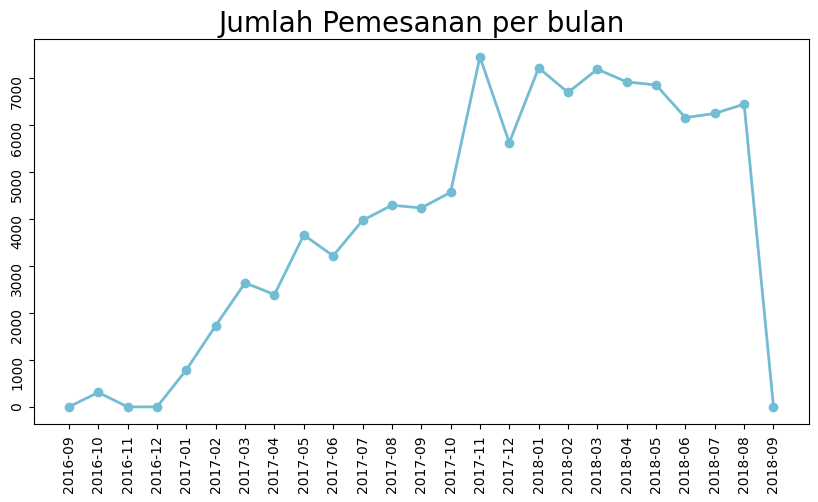

In [137]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Jumlah Pemesanan per bulan", loc="center", fontsize=20) 
plt.xticks(rotation = 90, fontsize=10) 
plt.yticks(rotation = 90, fontsize=10) 
plt.show()

Berikut adalah visualisasi jumlah pendapat per bulan (dalam satu juta dollar)

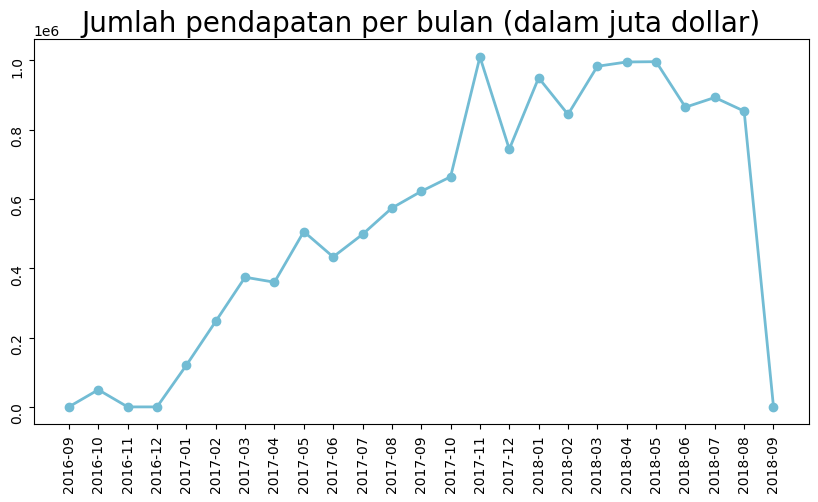

In [138]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Jumlah pendapatan per bulan (dalam juta dollar)", loc="center", fontsize=20)
plt.xticks(rotation = 90, fontsize=10) 
plt.yticks(rotation = 90, fontsize=10) 
plt.show()

### Pertanyaan 2: Produk pada kategori apa yang paling banyak dan sedikit terjual?

akan dibuat data **sum_order_items_df** yang digunakan untuk menampung produk 

In [121]:
sum_order_items_df = all_df.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english" : "category",
    "order_id": "order_count",
}, inplace=True)
sum_order_items_df.head(5)

,category,order_count
0,bed_bath_table,12718
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [122]:
sum_order_items_df.tail(5)

,category,order_count
68,cds_dvds_musicals,14
69,la_cuisine,14
70,pc_gamer,9
71,fashion_childrens_clothes,8
72,security_and_services,2


Berikut adalah visualisasi produk terbaik dan terburuk berdasarkan jumlah pemesanan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19100\3487413277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19100\3487413277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="category", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1])


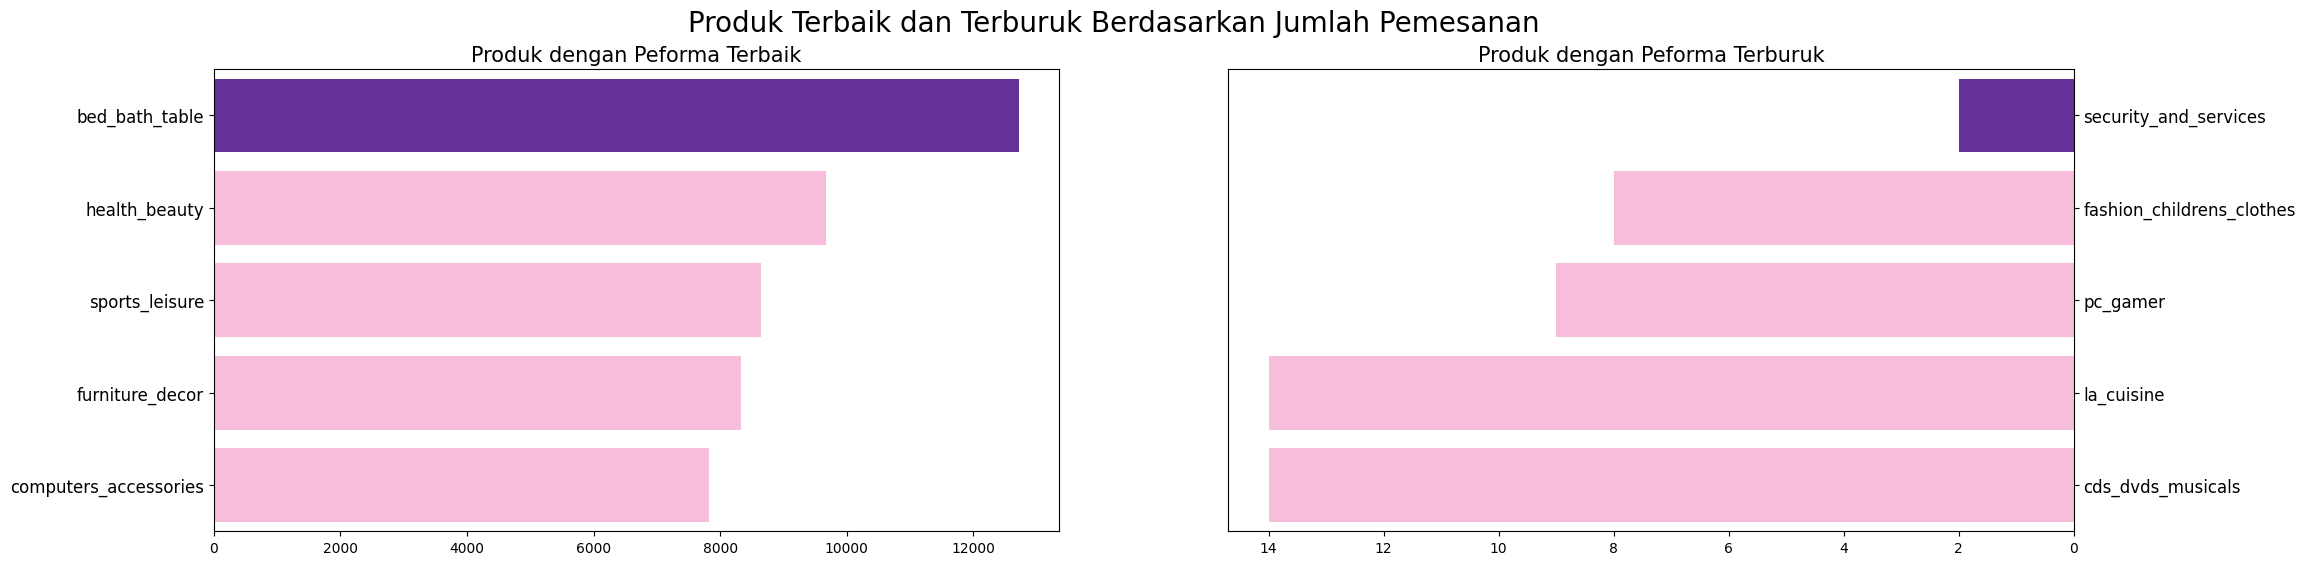

In [145]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#6420AA", "#FFB5DA", "#FFB5DA", "#FFB5DA", "#FFB5DA"]
 
sns.barplot(x="order_count", y="category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Peforma Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_count", y="category", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Peforma Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Produk Terbaik dan Terburuk Berdasarkan Jumlah Pemesanan", fontsize=20)
plt.show()

### Pertanyaan 3,4,5:
### - Kapan terakhir pelanggan melakukan transaksi? 
### - Seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir?
### - Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

Untuk 3 pertanyaan akhir akan dilakukan analisis RFM. RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary. 

Berikut ini adalah proses pembuatan dataframe untuk ketiga pertanyaan tersebut 

In [132]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique", 
    "price": "sum" 
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [147]:
print(recent_date)

2018-10-17


In [133]:
rfm_df.describe()

,frequency,monetary,recency
count,98604.0,98604.000000,98604.000000
mean,1.0,137.767916,289.783437
std,0.0,210.670117,153.378767
min,1.0,0.850000,44.000000
25%,1.0,45.900000,166.000000
50%,1.0,86.900000,271.000000
75%,1.0,149.900000,400.000000
max,1.0,13440.000000,773.000000


Perhatikan bahwa nilai dari **frequency** memiliki nilai max 1, artinya masing-masing pelanggan pada dataset yang bersangkutan mengorder maksimum sebanyak 1 kali

Berikut adalah kode untuk visualisasi analisis RFM

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19100\1408071474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19100\1408071474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19100\1408071474.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

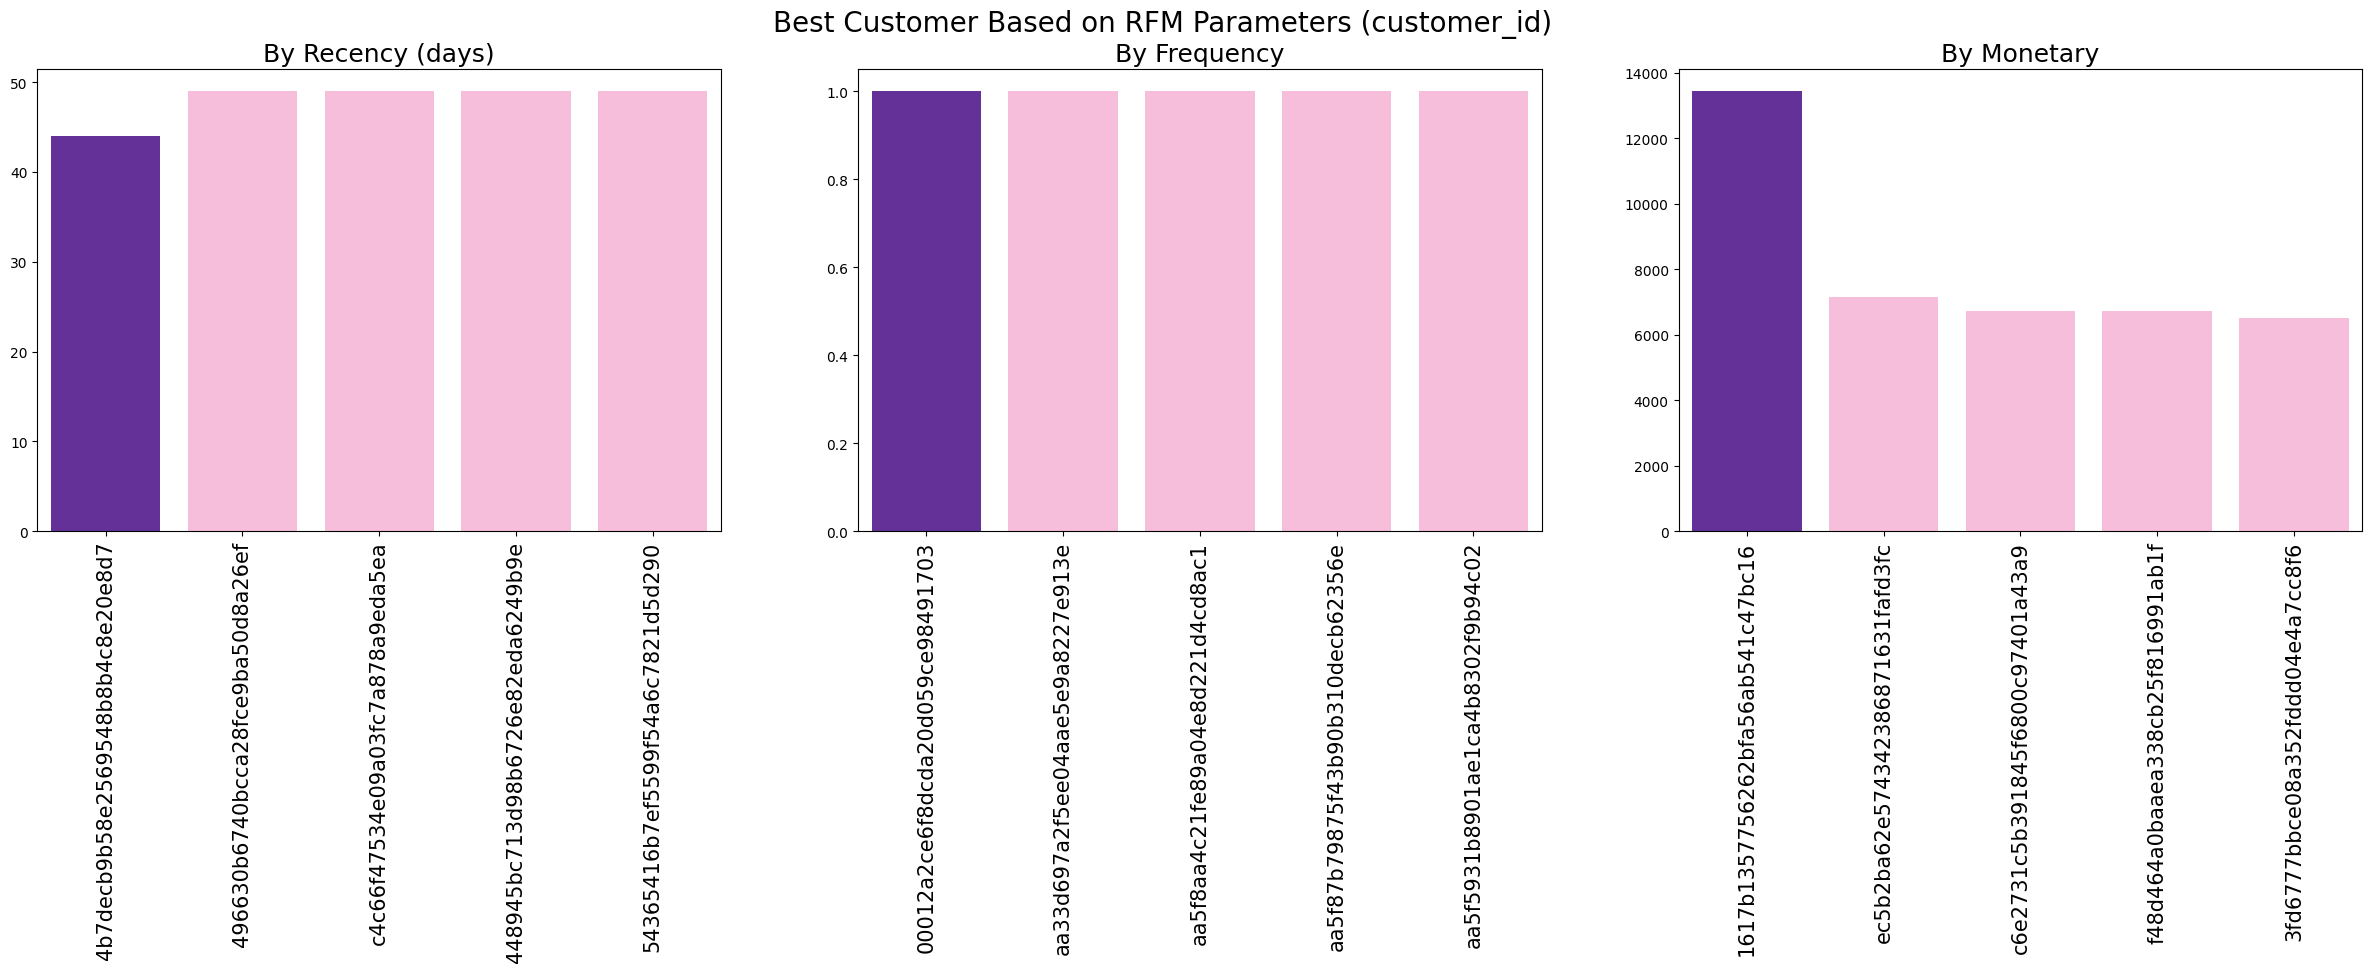

In [146]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#6420AA", "#FFB5DA", "#FFB5DA", "#FFB5DA", "#FFB5DA"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation = 90)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation = 90)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation = 90)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Bagaimana peforma penjualan beberapa bulan terakhir?<br>
Peforma penjualan beberapa bulan terakhir cukup baik, Namun menurun pada tahun 2018 bulan 9. Penjualan terbaik terjadi pada tahun 2017 bulan 11
- Conclution pertanyaan 2: Produk pada kategori apa yang paling banyak dan sedikit terjual?<br>
5 kategori produk dengan penjualan terbanyak adalah **bed_bath_table**, **health_beauty**, **sports_leisure**, **furniture_decor**, dan **computers_accessories**.
5 ketegori produk dengan penjualan terendah adalah **security_and_services**, **fashion_childerns_clothes**, **pc_gamer**, **la_cuisine**, dan **cds_dvds_musicals**
- Conclution pertanyaan 3: Kapan terakhir pelanggan melakukan transaksi?<br>
Pelanggan terakhir melakukan transaksi adalah sekitar 44 hari yang lalu, dengan id pelanggan 4b7decb9b58e...d7.
- Conclution pertanyaan 4: Seberapa sering pelanggan melakukan pembelian dalam beberapa bulan terakhir?<br>
Berdasarkan data yang ada, semua pelanggan hanya melakukan transaksi maksimal sebanyak 1 kali saja
- Conclution pertanyaan 5: Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?Uang yang paling banyak dihabiskan oleh pelangan dalam bebrapa bulan terakhir adalah sekitar 13700 dollar. Diikuti dengan empat pelanggan selanjutnya yang berkisar 7000 dollar


In [144]:
all_df.to_csv("E-Commerce Public Dataset/all_data.csv", index=False)

In [148]:
orders_df.to_csv("E-Commerce Public Dataset/orders_df.csv")